In [1]:
import pandas as pd
import numpy as np
import pylab as plt
%matplotlib inline

#Set the global default size of matplotlib figures
plt.rc('figure',figsize=(10,5))

#Size of maltplotlib figures that contain subplots
fizsize_with_subplots=(10,10)

#Size of matplotlib histogram bins
bin_size=10

df_train=pd.read_csv('train.csv')
print df_train.head()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


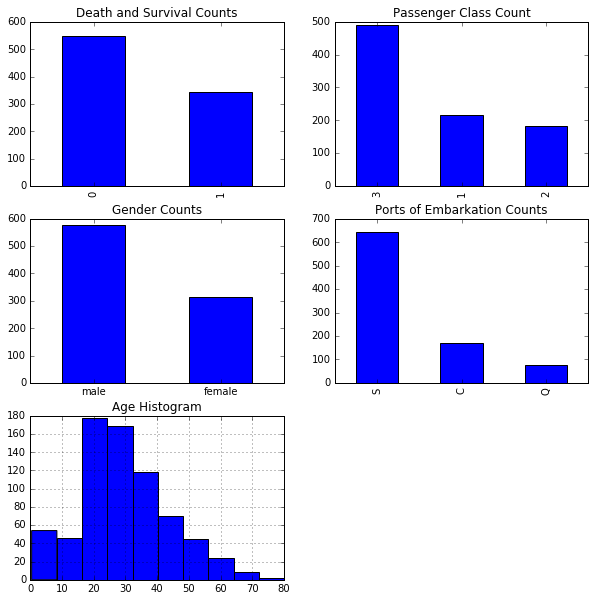

In [2]:
#Set up a grid of plot
fig=plt.figure(figsize=fizsize_with_subplots);
fig_dims=(3,2)

#Plot death and survival counts
plt.subplot2grid(fig_dims,(0,0))
df_train['Survived'].value_counts().plot(kind='bar',title='Death and Survival Counts')

#Plot pclass counts
plt.subplot2grid(fig_dims,(0,1))
df_train['Pclass'].value_counts().plot(kind='bar',title='Passenger Class Count')

#Plot Sex counts
plt.subplot2grid(fig_dims,(1,0))
df_train['Sex'].value_counts().plot(kind='bar',title='Gender Counts')

plt.xticks(rotation=0)

#Plot Embarked counts
plt.subplot2grid(fig_dims,(1,1))
df_train['Embarked'].value_counts().plot(kind='bar',title='Ports of Embarkation Counts')

#Plot the Age histogram
plt.subplot2grid(fig_dims,(2,0))
df_train['Age'].hist()
plt.title('Age Histogram')
plt.show()

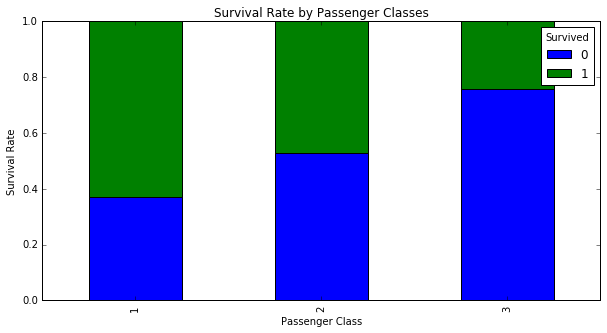

In [3]:
#Plot survival rates by passenger classes
pclass_xt=pd.crosstab(df_train['Pclass'],df_train['Survived'])
pclass_xt

#Normalize the cross tab to sum to 1
pclass_xt_pct=pclass_xt.div(pclass_xt.sum(1).astype(float),axis=0)
pclass_xt_pct.plot(kind='bar',
                   stacked=True,
                   title='Survival Rate by Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

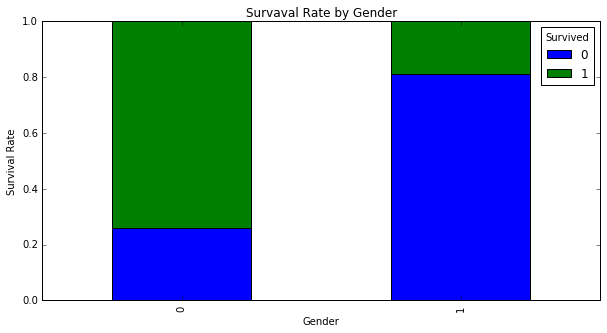

In [4]:
#Plot survaval rate by genter
sexes=sorted(df_train['Sex'].unique())
genders_mapping=dict(zip(sexes,range(0,len(sexes)+1)))
genders_mapping

df_train['Sex_Val']=df_train['Sex'].map(genders_mapping).astype(int)
df_train.head()

sex_val_xt=pd.crosstab(df_train['Sex_Val'],df_train['Survived'])
sex_val_xt_pct=sex_val_xt.div(sex_val_xt.sum(1).astype(float),axis=0)
sex_val_xt_pct.plot(kind='bar',stacked=True,title='Survaval Rate by Gender')
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.show()

M:  1 122
F:  1 94
M:  2 108
F:  2 76
M:  3 347
F:  3 144


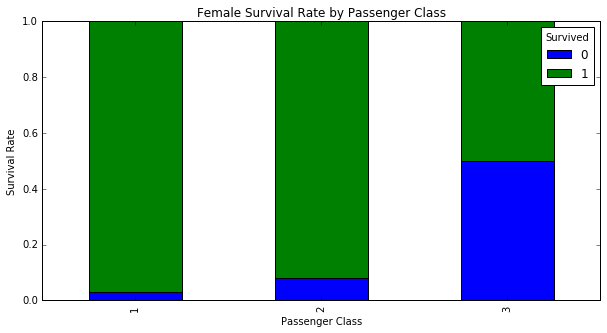

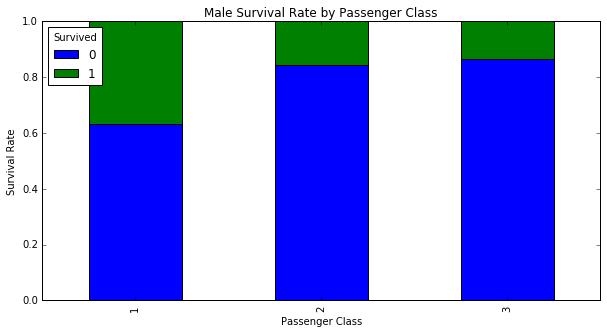

In [5]:
# Get the unique values of Pclass:
passenger_classes=sorted(df_train['Pclass'].unique())
for p_class in passenger_classes:
    print 'M: ',p_class,len(df_train[(df_train['Sex']=='male')&(df_train['Pclass']==p_class)])
    print 'F: ',p_class,len(df_train[(df_train['Sex']=='female')&(df_train['Pclass']==p_class)])

#Plot survival rate by Sex
females_df=df_train[df_train['Sex']=='female']
females_xt=pd.crosstab(females_df['Pclass'],females_df['Survived'])
females_xt_pct=females_xt.div(females_xt.sum(1).astype(float),axis=0)
females_xt_pct.plot(kind='bar',
                    stacked=True,
                    title='Female Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

#Plot survival rate by Pclass
males_df=df_train[df_train['Sex']=='male']
males_xt=pd.crosstab(males_df['Pclass'],males_df['Survived'])
males_xt_pct=males_xt.div(males_xt.sum(1).astype(float),axis=0)
males_xt_pct.plot(kind='bar',
                  stacked=True,
                  title='Male Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

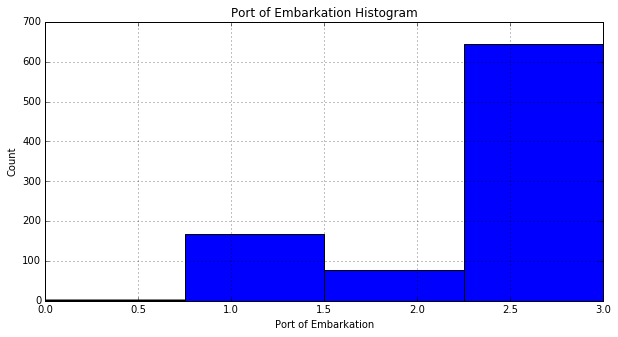

In [6]:
#Get the unique values of Embarked
df_train[df_train['Embarked'].isnull()]
embarked_locs=sorted(df_train['Embarked'].unique())
embarked_locs_mapping=dict(zip(embarked_locs,range(0,len(embarked_locs)+1)))
embarked_locs_mapping

df_train['Embarked_Val']=df_train['Embarked'].map(embarked_locs_mapping).astype(int)
df_train.head()

df_train['Embarked_Val'].hist(bins=len(embarked_locs), range=(0, 3))
plt.title('Port of Embarkation Histogram')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

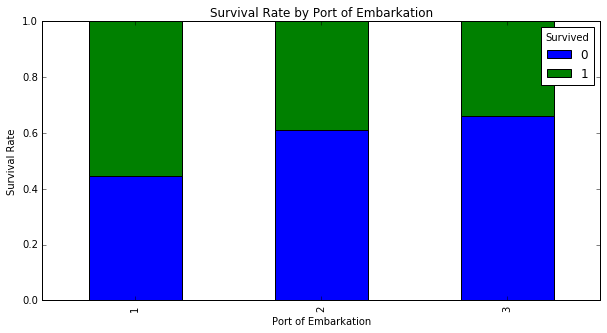

In [7]:
#Since the vast majority of passengers embarked in 'S': 3, 
#we assign the missing values in Embarked to 'S':

if len(df_train[df_train['Embarked'].isnull()]>0):
    df_train.replace({'Embarked_Val':{embarked_locs_mapping[embarked_locs_mapping.keys()[0]]:embarked_locs_mapping['S']}},inplace=True)

embarked_locs=sorted(df_train['Embarked_Val'].unique())
embarked_locs

embarked_val_xt=pd.crosstab(df_train['Embarked_Val'],df_train['Survived'])
embarked_val_xt_pct=embarked_val_xt.div(embarked_val_xt.sum(1).astype(float),axis=0)
embarked_val_xt_pct.plot(kind='bar',
                         stacked=True)
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')
plt.show()


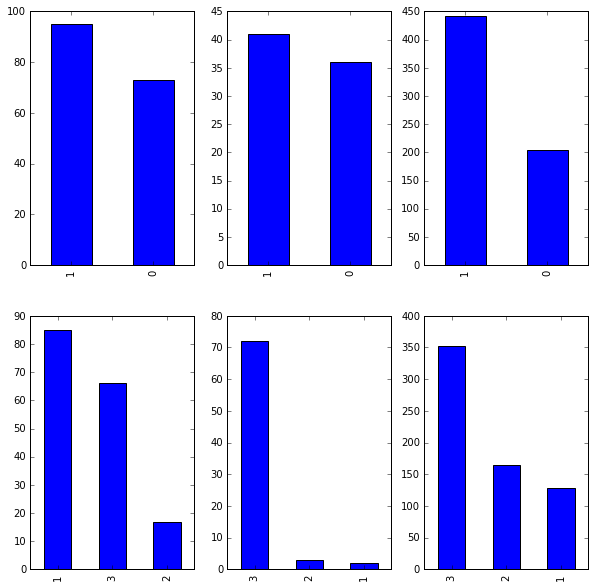

In [8]:
#Set up a grid of plots
fig=plt.figure(figsize=fizsize_with_subplots)

rows=2
cols=3
col_names=('Sex_Val','Pclass')

for portIdx in embarked_locs:
    for colIdx in range(0,len(col_names)):
        plt.subplot2grid((rows,cols),(colIdx,portIdx-1))
        df_train[df_train['Embarked_Val']==portIdx][col_names[colIdx]].value_counts().plot(kind='bar')
plt.show()

In [9]:
#Add dummy variables for Embarked_Val
df_train=pd.concat([df_train,pd.get_dummies(df_train['Embarked_Val'],prefix='Embarked_Val')],axis=1)

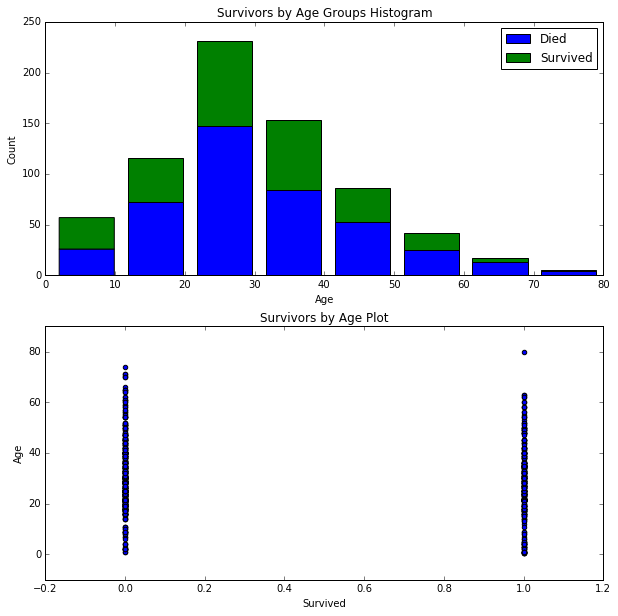

In [10]:
#Filter Age values because there are many missing values
df_train[df_train['Age'].isnull()][['Sex','Pclass','Age']].head()

#To keep Age in tact, make a copy of it called AgeFill
#that we will use to fill in the missiong ages:
df_train['AgeFill']=df_train['Age']

#Populate AgeFill
df_train['AgeFill']=df_train['AgeFill'].groupby([df_train['Sex_Val'],df_train['Pclass']]).apply(lambda x: x.fillna(x.median()))
len(df_train[df_train['AgeFill'].isnull()])

#Set up a grid of plots
fix, axes=plt.subplots(2,1,figsize=fizsize_with_subplots)

#Histogram of AgeFill segmented by Survived
df1=df_train[df_train['Survived']==0]['Age']
df2=df_train[df_train['Survived']==1]['Age']
max_age=max(df_train['AgeFill'])

axes[0].hist([df1,df2],bins=max_age/bin_size,range=(1,max_age),stacked=True)
axes[0].legend(('Died','Survived'),loc='best')
axes[0].set_title('Survivors by Age Groups Histogram')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

#Scateter plot Survived and  AgeFill
axes[1].scatter(df_train['Survived'],df_train['AgeFill'])
axes[1].set_title('Survivors by Age Plot')
axes[1].set_xlabel('Survived')
axes[1].set_ylabel('Age')
plt.show()

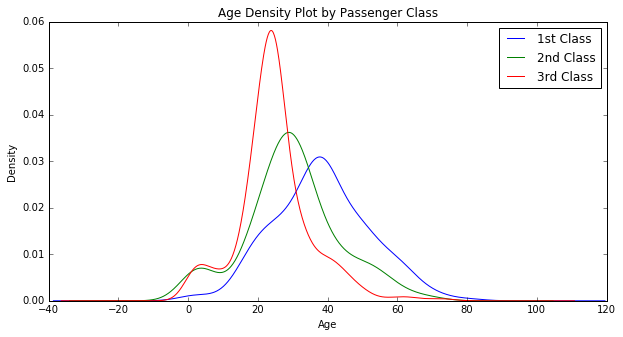

In [11]:
#Plot AgeFill density by Pclass
for pclass in passenger_classes:
    df_train.AgeFill[df_train.Pclass==pclass].plot(kind='kde')
plt.title('Age Density Plot by Passenger Class')
plt.xlabel('Age')
plt.legend(('1st Class','2nd Class','3rd Class'),loc='best')
plt.show()

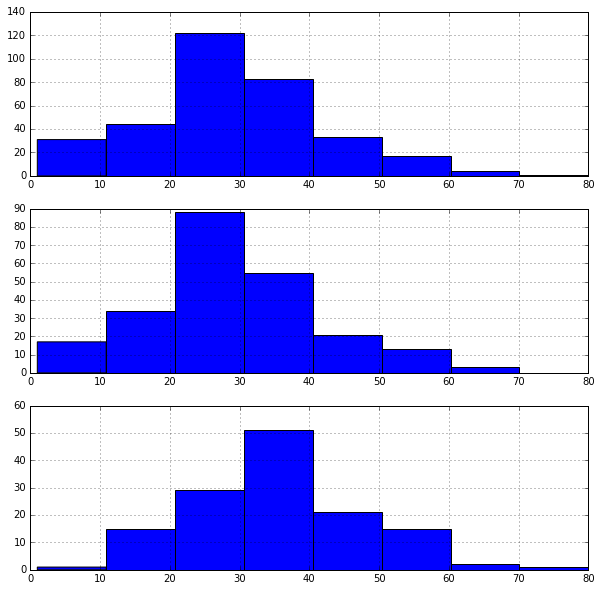

In [12]:
#Set up a grid of plots
fig=plt.figure(figsize=fizsize_with_subplots)
fig_dims=(3,1)

#Plot the AgeFill histogram for Survivors
plt.subplot2grid(fig_dims,(0,0))
survived_df=df_train[df_train['Survived']==1]
survived_df['AgeFill'].hist(bins=max_age/bin_size,range=(1,max_age))

#Plot the AgeFill histogram for Females
plt.subplot2grid(fig_dims,(1,0))
female_df=df_train[(df_train['Sex_Val']==0)&(df_train['Survived']==1)]
female_df['AgeFill'].hist(bins=max_age/bin_size,range=(1,max_age))

#Plot the AgeFill histogram for first class passengers
plt.subplot2grid(fig_dims,(2,0))
class1_df=df_train[(df_train['Pclass']==1)&(df_train['Survived']==1)]
class1_df['AgeFill'].hist(bins=max_age/bin_size,range=(1,max_age))
plt.show()

#In the first graph, we see that most survivors come from the 20's 
#to 30's age ranges and might be explained by the following two graphs. 
#The second graph shows most females are within their 20's. 
#The third graph shows most first class passengers are within their 30's.

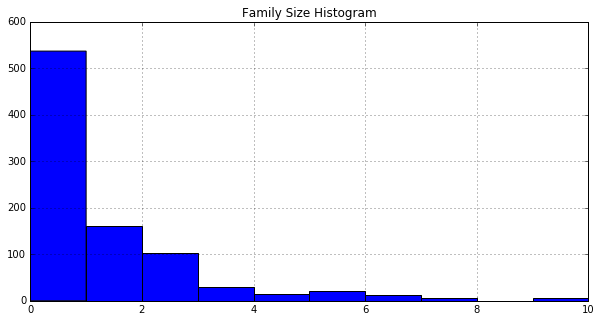

In [13]:
#Family Size -- Define a new feature FamilySize that is the sum of 
#Parch (number of parents or children on board) and SibSp (number of 
#siblings or spouses):
df_train['FamilySize']=df_train['SibSp']+df_train['Parch']
df_train.head()

df_train['FamilySize'].hist()
plt.title('Family Size Histogram')
plt.show()

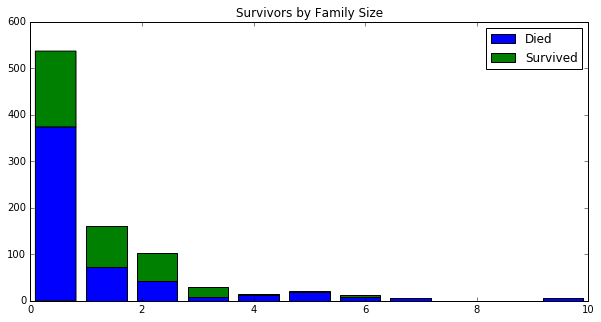

In [14]:
#Plot a histogram of FamilySize segmented by Survived
family_sizes=sorted(df_train['FamilySize'].unique())
family_size_max=max(family_sizes)

df1=df_train[df_train['Survived']==0]['FamilySize']
df2=df_train[df_train['Survived']==1]['FamilySize']
plt.hist([df1,df2],bins=family_size_max+1,
         range=(0,family_size_max),
         stacked=True)
plt.legend(('Died','Survived'),loc='best')
plt.title('Survivors by Family Size')
plt.show()

In [15]:
df_train.dtypes[df_train.dtypes.map(lambda x: x==object)]

#Drop columns we won't use:
df_train=df_train.drop(['Name','Sex','Ticket','Cabin','Embarked','Age','SibSp','PassengerId','Embarked_Val'],axis=1)
df_train.dtypes

Survived            int64
Pclass              int64
Parch               int64
Fare              float64
Sex_Val             int64
Embarked_Val_1    float64
Embarked_Val_2    float64
Embarked_Val_3    float64
AgeFill           float64
FamilySize          int64
dtype: object